![Imgur](https://i.imgur.com/plwh6Hm.png)

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
import re

In [2]:
pd.set_option('max_columns', None)

df = pd.read_csv("/Users/ankitsharma/Documents/Documents/Stuff/Machine Learning/Kaggle/data visualization/fifa-18-demo-player-dataset/CompleteDataset.csv", index_col = 0)

/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (23,35) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
footballers = df.copy()
footballers['Unit'] = df['Value'].str[-1]
footballers['Value (M)'] = np.where(footballers['Unit'] == '0', 0, footballers['Value'].str[1:-1].replace(r'[a-zA-Z]','')
                                   )

footballers['Value (M)'] = footballers['Value (M)'].astype(float)

footballers['Value (M)'] = np.where(footballers['Unit'] == 'M',
                                   footballers['Value (M)'],
                                   footballers['Value (M)'] / 1000)

footballers = footballers.assign(Value = footballers['Value (M)'],
                                Position = footballers['Preferred Positions'].str.split().str[0]
                                )

In [6]:
footballers.head()

,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,Free kick accuracy,GK diving,GK handling,GK kicking,GK positioning,GK reflexes,Heading accuracy,Interceptions,Jumping,Long passing,Long shots,Marking,Penalties,Positioning,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,CAM,CB,CDM,CF,CM,ID,LAM,LB,LCB,LCM,LDM,LF,LM,LS,LW,LWB,Preferred Positions,RAM,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST,Unit,Value (M),Position
0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,95.5,€565K,2228,89,63,89,63,93,95,85,81,91,94,76,7,11,15,14,11,88,29,95,77,92,22,85,95,96,83,94,23,91,92,31,80,85,88,89.0,53.0,62.0,91.0,82.0,20801,89.0,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,ST LW,89.0,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0,M,95.5,ST
1,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,105.0,€565K,2154,92,48,90,95,95,96,77,89,97,95,90,6,11,15,14,8,71,22,68,87,88,13,74,93,95,88,85,26,87,73,28,59,90,85,92.0,45.0,59.0,92.0,84.0,158023,92.0,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,RW,92.0,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0,M,105.0,RW
2,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,123.0,€280K,2100,94,56,96,82,95,92,75,81,96,89,84,9,9,15,15,11,62,36,61,75,77,21,81,90,88,81,80,33,90,78,24,53,80,83,88.0,46.0,59.0,88.0,79.0,190871,88.0,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,LW,88.0,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0,M,123.0,LW
3,L. Suárez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,97.0,€510K,2291,88,78,86,60,91,83,77,86,86,94,84,27,25,31,33,37,77,41,69,64,86,30,85,92,93,83,87,38,77,89,45,80,84,88,87.0,58.0,65.0,88.0,80.0,176580,87.0,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,ST,87.0,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0,M,97.0,ST
4,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92,92,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,61.0,€230K,1493,58,29,52,35,48,70,15,14,30,13,11,91,90,95,91,89,25,30,78,59,16,10,47,12,85,55,25,11,61,44,10,83,70,11,NaN,NaN,NaN,NaN,NaN,167495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M,61.0,GK


# The FacetGrid

The core `seaborn` utility for faceting is the `FacetGrid`. A `FacetGrid` is an object which stores some information on how you want to break up your data visualization.

For example, suppose that we're interested in (as in the previous notebook) comparing strikers and goalkeepers in some way. To do this, we can create a `FacetGrid` with our data, telling it that we want to break the `Position` variable down by col (column).

Since we're zeroing in on just two positions in particular, this results in a pair of grids ready for us to "do" something with them:

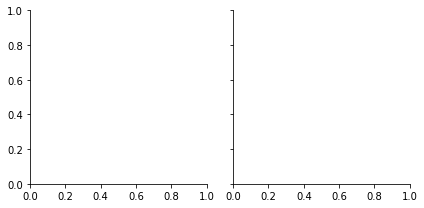

In [7]:
df = footballers[footballers['Position'].isin(['ST', 'GK'])]

g = sns.FacetGrid(df, col = "Position")

From here we use the `map` object method to plot the data into the laid-out grid.

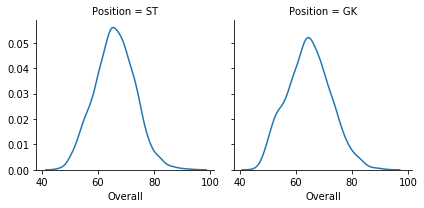

In [8]:
df = footballers[footballers['Position'].isin(['ST', 'GK'])]

g = sns.FacetGrid(df, col = "Position")

g.map(sns.kdeplot, "Overall")

Passing a method into another method like this may take some getting used to, if this is your first time seeing this being done. But once you get used to it, `FacetGrid` is very easy to use.

By using an object to gather "design criteria", `seaborn` does an effective job seamlessly marrying the data representation to the data values, sparing us the need to lay the plot out ourselves.

We're probably interested in more than just goalkeepers and strikers, however. But if we squeezed all of the possible game positions into one row, the resulting plots would be tiny. `FacetGrid` comes equipped with a `col_wrap` parameter for dealing with this case exactly.

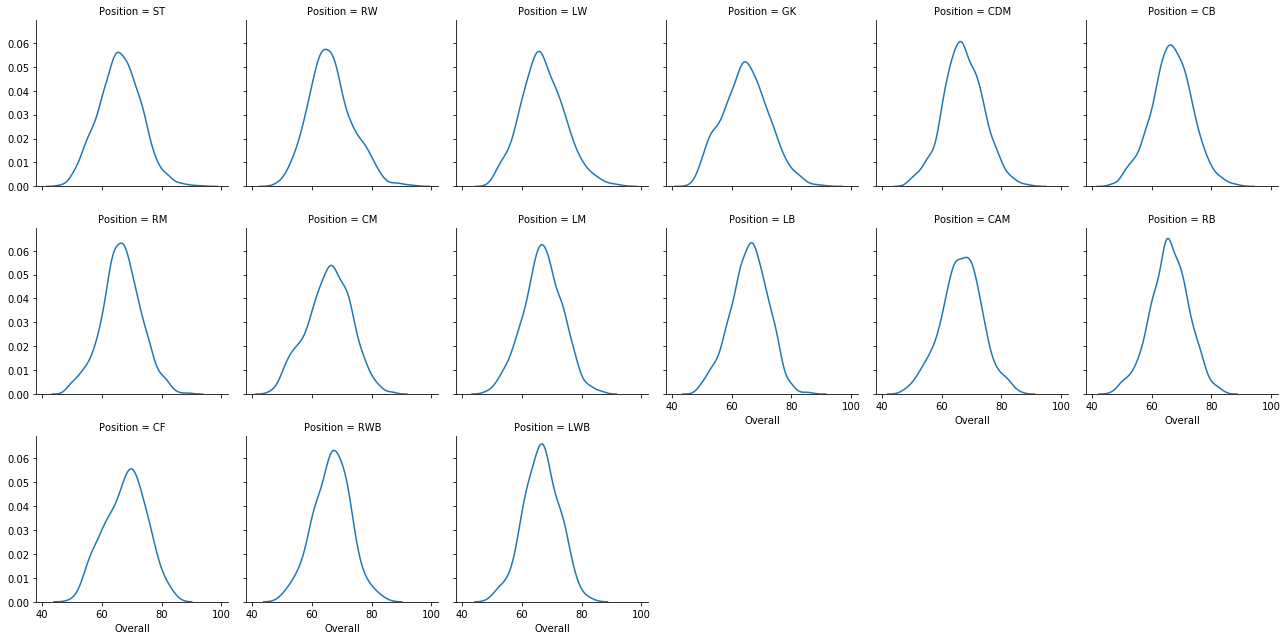

In [9]:
df = footballers

g = sns.FacetGrid(df, col = 'Position', col_wrap = 6)

g.map(sns.kdeplot, "Overall")

So far we've been dealing exclusively with one `col` (column) of data. The "grid" in `FacetGrid`, however, refers to the ability to lay data out by *row* and *column*.

For example, suppose we're interested in comparing the talent distribution for (goalkeepers and strikers specifically, to keep things succinct) across rival clubs Real Madrid, Atlético Madrid, and FC Barcelona.

As the plot below demonstrates, we can achieve this by passing `row=Position` and `col=Club` parameters into the plot.

/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


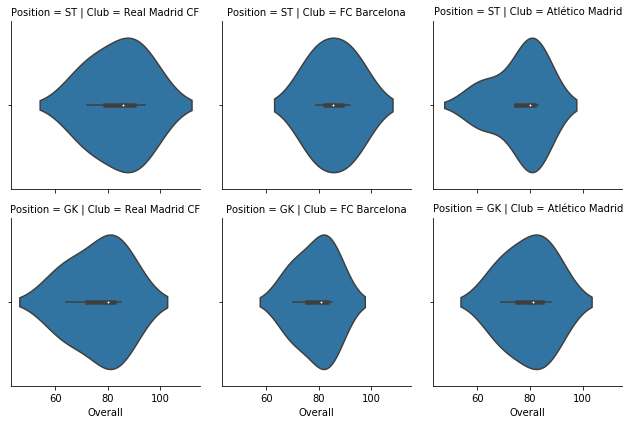

In [11]:
df = footballers[footballers['Position'].isin(['ST', 'GK'])]

df = df[df['Club'].isin(['Real Madrid CF', 'FC Barcelona', 'Atlético Madrid'])]

g = sns.FacetGrid(df, row='Position', col = 'Club')

g.map(sns.violinplot, "Overall")